In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, Ridge, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsRegressor

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Some Basic Directories for housekeeping
# set location of input files:
inpDir = os.path.join( '..', 'input')

outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

CMAP = plt.cm.rainbow
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.2

NOISE = 0.1
N_SAMPLE = 1000
ALPHA = 0.001

<Figure size 640x480 with 0 Axes>

In [3]:
# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 75,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }


plt.rcParams.update(params)

'''plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))
'''
np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('display.precision', 2)

__all__ = ['np', 'display', 'plt', 'pd', 'sklearn', 'seaborn']

In [4]:
def fn_make_wave(n_samples = 100):
    '''
    Args:
        n_samples : int, number of samples
        
    returns:
        x: np.ndarray column vector with n_samples values
        y: np.ndarray labels
    '''
    
    # instantiate random state
    rnd = np.random.RandomState(RANDOM_STATE)
    
    # generate n_samples
    x = rnd.uniform(-3,3, size = n_samples)
    
    # generate y
    y_no_noise = (np.sin(4 * x) + x)
    
    # add some noise
    y = (y_no_noise + rnd.normal(size = len(x))) / 2
    
    return x.reshape(-1,1), y

In [5]:
n_neighbors = 1    # One neighbor

X, y = fn_make_wave(n_samples = 100)     # Using the function generate data

# Split in test and train
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = RANDOM_STATE,
                                                   test_size = 4)

# Calculate distance
dist = euclidean_distances(X_train, X_test)

# Arrange in acsending order of distance
closest = np.argsort(dist, axis = 0)

### Fit the data and make predictions

In [6]:
reg = KNeighborsRegressor(n_neighbors = n_neighbors).fit(X_train, y_train)

y_pred = reg.predict(X_test)

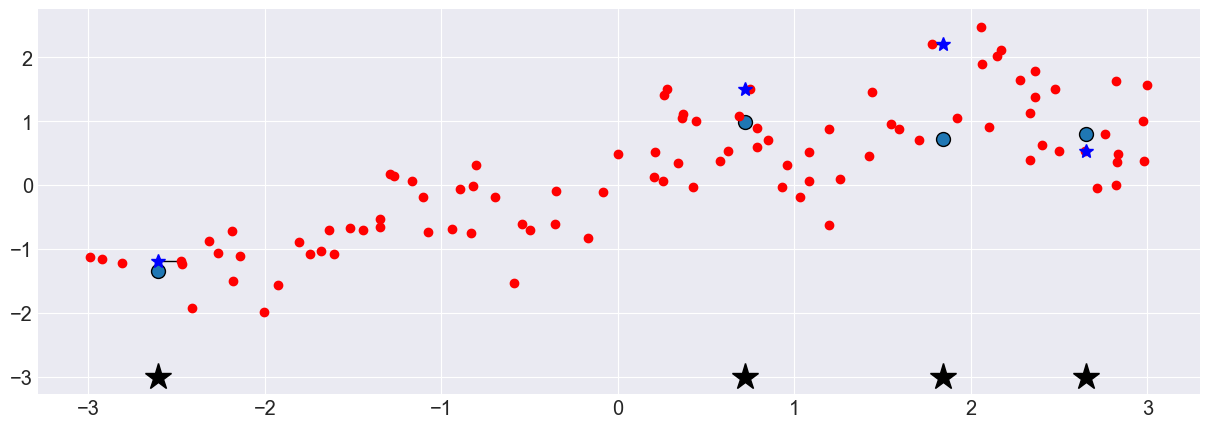

In [7]:
fig, ax = plt.subplots()    # intantiate

ax.plot(X_train, y_train, 'o', c = 'r')     # Plot train data

ax.plot(X_test,    # values same as test
       -3 * np.ones(len(X_test)),    # no y values
       '*', c = 'black',
       markersize = 20)     # Plot test data

# predicted values
ax.plot(X_test, y_pred, '*', c = 'b', markersize = 10)

for x, y_, neighbors in zip(X_test, y_pred, closest.T):
    for neighbor in neighbors[:n_neighbors]:
        plt.arrow(x[0], y_,
                 X_train[neighbor, 0] - x[0],
                 y_train[neighbor] - y_,
                 head_width = 0,
                 fc = 'k', ec = 'k')
        
ax.scatter(X_test, y_test, s = 100, edgecolor = 'k', facecolor = None)

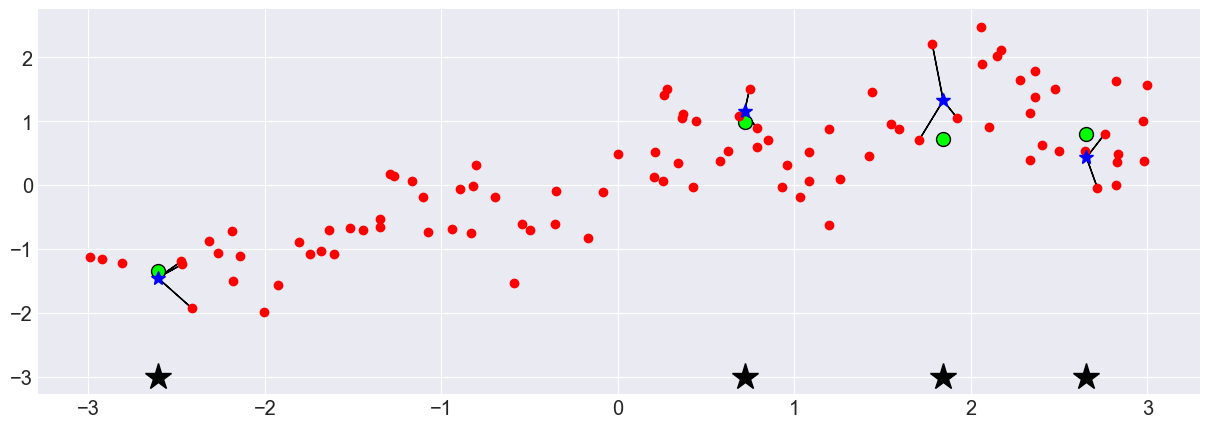

In [8]:
n_neighbors = 3    # Three neighbor

reg = KNeighborsRegressor(n_neighbors = n_neighbors).fit(X_train, y_train)     # train new regressor

y_pred = reg.predict(X_test)      # make predictions

### ------- Plot as earlier 
fig, ax = plt.subplots()    # intantiate

ax.plot(X_train, y_train, 'o', c = 'r')     # Plot train data

ax.plot(X_test,    # values same as test
       -3 * np.ones(len(X_test)),    # no y values
       '*', c = 'black',
       markersize = 20)     # Plot test data

# predicted values
ax.plot(X_test, y_pred, '*', c = 'b', markersize = 10)

for x, y_, neighbors in zip(X_test, y_pred, closest.T):
    for neighbor in neighbors[:n_neighbors]:
        plt.arrow(x[0], y_,
                 X_train[neighbor, 0] - x[0],
                 y_train[neighbor] - y_,
                 head_width = 0,
                 fc = 'k', ec = 'k')
        
ax.scatter(X_test, y_test, s = 100, edgecolor = 'k', facecolor = 'lime')

### Regression

### Generate Data

In [9]:
def fn_generate_lin_data():
    start = -1
    end = 2
    delta = 0.05
    X = np.arange(start,end+delta, delta) #Define X Data
    
    y_rnd = np.random.rand(X.shape[0])
    y_train = 2 * X + y_rnd
    
    y_rnd = np.random.rand(X.shape[0])
    y_test = (2 - y_rnd) * X + y_rnd
    
    # Plot for visualization
    fig = plt.figure()   # Add a figure
    ax = fig.add_subplot()   # add an axis to the figure
    ax.scatter(X, y_train)
    ax.scatter(X, y_test)
    ax.axhline(0, c = 'k', lw = 1)
    ax.axvline(0, c = 'k', lw = 1)
    ax.grid()
    
    return X, X, y_train, y_test

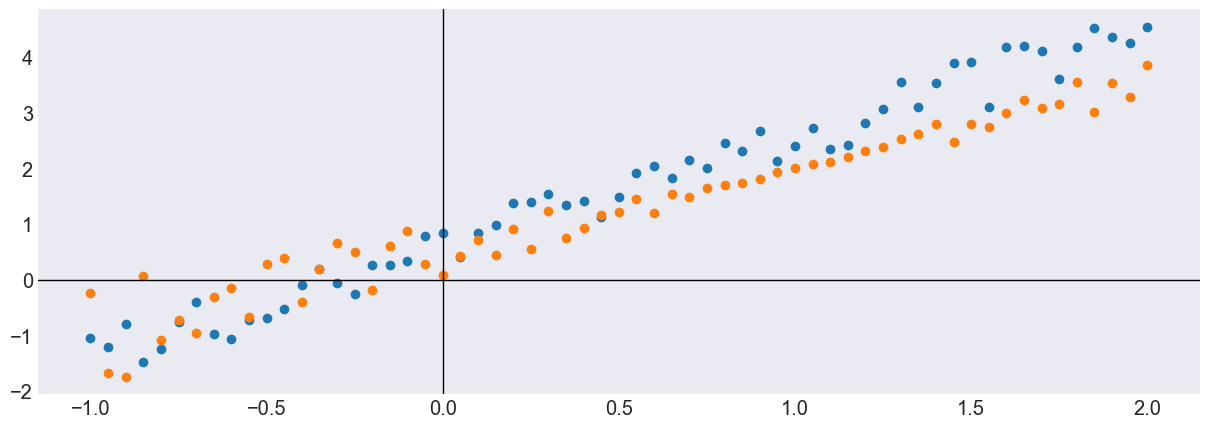

In [10]:
X_train, X_test, y_train, y_test = fn_generate_lin_data()

In [11]:
lr = LinearRegression()

lr.fit(X_train.reshape(-1, 1), y_train)     # Reshaping x to make it 2D as per sklearn datastructure

lr.coef_, lr.intercept_

(array([1.99]), 0.6044546105188306)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_train.reshape(-1,1))
err_train = mean_squared_error(y_train,y_pred)
y_pred = lr.predict(X_test.reshape(-1,1))
err_test = mean_squared_error(y_test,y_pred)
r2s = r2_score(y_test, y_pred)
print(f'Error- Train:{err_train:.3f} | Test:{err_test:.3f} | R2 Score{r2s:.4f}')

Error- Train:0.073 | Test:0.386 | R2 Score0.7948


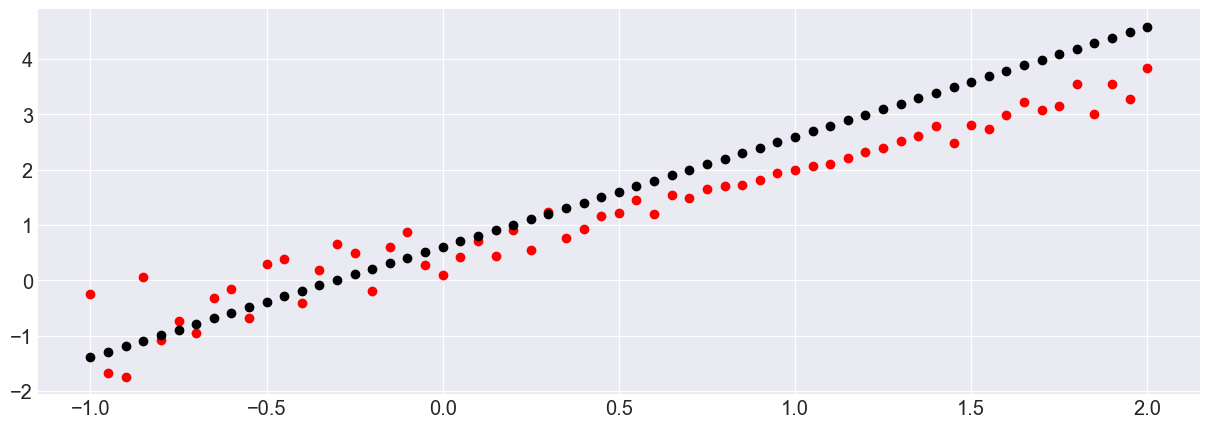

In [13]:
fig,ax=plt.subplots()

ax.scatter(X_test,y_test,c='r')
ax.scatter(X_test,y_pred,c='black')

### Ridge Regression

In [14]:
ridge=Ridge(alpha=10)

ridge.fit(X_train.reshape(-1,1),y_train)

ridge.coef_,lr.intercept_

(array([1.643]), 0.6044546105188306)

In [15]:
y_pred = ridge.predict(X_train.reshape(-1,1))
print(mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))

0.22334293142301423 0.8811891053478977


In [16]:
y_pred = ridge.predict(X_train.reshape(-1,1))      # predict on train
err_train = mean_squared_error(y_train,y_pred)    # cal error on train
y_pred = ridge.predict(X_test.reshape(-1,1))      # predict on test
err_test = mean_squared_error(y_test,y_pred)      # error on test
r2s = r2_score(y_test, y_pred)
print(f'Error- Train:{err_train:.3f} | Test:{err_test:.3f} | R2 Score{r2s:.4f}')

Error- Train:0.166 | Test:0.223 | R2 Score0.8812


### Lasso

In [17]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha = 0.1)
reg.fit(X_train.reshape(-1,1),y_train)
print(reg.coef_)
print(reg.intercept_)

[1.861]
0.668970739551089


In [18]:
y_pred = reg.predict(X_train.reshape(-1,1))      # predict on train
err_train = mean_squared_error(y_train,y_pred)    # cal error on train
y_pred = reg.predict(X_test.reshape(-1,1))      # predict on test
err_test = mean_squared_error(y_test,y_pred)      # error on test
r2s = r2_score(y_test, y_pred)
print(f'Error- Train:{err_train:.3f} | Test:{err_test:.3f} | R2 Score{r2s:.4f}')

Error- Train:0.085 | Test:0.304 | R2 Score0.8385


*Linear Error- Train:0.073 | Test:0.386 | R2 Score0.7948

*Ridge Error- Train:0.166 | Test:0.223 | R2 Score0.8812

*Lasso Error- Train:0.085 | Test:0.304 | R2 Score0.8385

In [ ]:
fig,ax=plt.subplots(1,2,1)
ax[0].scatter(X_test,y_test,c='r')
ax[0].scatter(X_test,y_pred,c='black')
ridge.fit(X_train.reshape(-1,1),y_train)




In [19]:
### Elastic Net
from sklearn.linear_model import ElasticNet

In [22]:
reg = ElasticNet(alpha = 0.3)
reg.fit(X_train.reshape(-1,1),y_train)
print(reg.coef_)
print(reg.intercept_)

[1.505]
0.8469202747300576


In [23]:
y_pred = reg.predict(X_train.reshape(-1,1))      # predict on train
err_train = mean_squared_error(y_train,y_pred)    # cal error on train
y_pred = reg.predict(X_test.reshape(-1,1))      # predict on test
err_test = mean_squared_error(y_test,y_pred)      # error on test
r2s = r2_score(y_test, y_pred)
print(f'Error- Train:{err_train:.3f} | Test:{err_test:.3f} | R2 Score{r2s:.4f}')

Error- Train:0.255 | Test:0.211 | R2 Score0.8879
